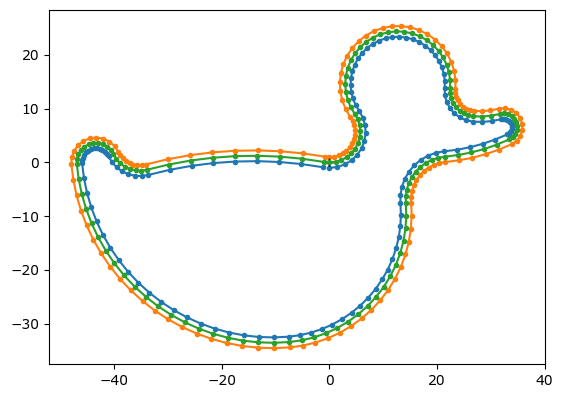

135

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi,exp,sign
deg=pi/180

StarSegments=[s for n,a in ((5,130.0,),) for _ in range(n) for s in ((2,-(a-360/n)*deg),(8,0.0),(3.2,a*deg),(8,0.0),)] 
DuckSegments=[(0.4,-10.0*deg),(13.297,25.0*deg),(3,-80.0*deg),(4,160.0*deg),(22.913,90.0*deg),(15,90.0*deg),(5,-90.0*deg), (5,20.0*deg),(3,170.0*deg),(2,-20.0*deg),(3,-90.0*deg),(15,220.0*deg),(5,-125.0*deg),]

def polygonArea(p):
  def crossprod(v1,v2):
    return v1.real*v2.imag-v2.real*v1.imag
  return 0.5*np.sum(crossprod(p[range(-1,len(p)-1)],p))
  
def SegmentsLengthArea(Segs): 
  nSegs=len(Segs) 
  dl,dang=np.array(Segs).transpose()
  l=sum(dl)
  ang=np.cumsum(dang)
  ang=exp(1j*np.insert( ang,0,0))
  dang_2=np.exp(1j*dang/2)
  viSeg=np.sinc(dang/(2*pi))*dl*dang_2*ang[:-1]
  pSeg=np.cumsum(viSeg)
  area=polygonArea(pSeg) +  np.nansum((dl/dang)**2*(dang/2.0-dang_2.real*dang_2.imag))
  return l,area

def InterpSegments(Segs,t,p0=0+0j,a0=1+0j,scale=1):
  dl,dang=np.array(Segs).transpose()
  l,ang=np.cumsum(Segs,axis=0).transpose()
  ang=exp(1j*np.insert(ang,0,0))*a0
  viSeg=np.sinc(dang/(2*pi))*dl*scale*np.exp(1j*dang/2)*ang[:-1]
  pSeg=np.cumsum(viSeg)+p0 
  l=l/l[-1]
  l=np.insert(l,0,0) 
  Xx=np.interp(np.array(t)%1,l,range(len(l)))
  X=Xx.astype(int)#segment index
  x=Xx%1#within seggment
  return pSeg[X-1] + np.sinc( dang[X]*x /(2*pi))* dl[X]*x *scale*np.exp(1j* dang[X]*x /2)*ang[X]
  
def Segments2Complex(Segs,p0=0+0j,scale=1.0,a0=1+0j,tol=0.05,offs=0,return_heading=False):
  a=a0
  p=p0
  p-=1j*a*offs
  for l,da in Segs:
    l=l*scale
    if da!=0:
      r=l/da
      r+=offs
      dl=2*abs(2*r*tol)**0.5
      n=max(int(abs(6*(da/(2*pi)))),int(l//dl)+1)
      dda=exp(1j*da/n)
      dda2=dda**0.5 
      v=(2*r*dda2.imag)*dda2*a
    else:
      n=1
      dda=1
      v=l*a
    for _ in range(n):
      p+=v
      if return_heading:
        yield p,a
      else:
        yield p
      v*=dda
      a*=dda
        
for offs in (-1,1,0):
  x,a=np.array(list(Segments2Complex(DuckSegments,scale=2.5,a0=-1,tol= 0.03,offs=offs,return_heading=True))).transpose()
#  x-=1j*a*offs
  plt.plot(0,0,'k+')
  plt.plot(x.real,x.imag,'.-') 
plt.gca().set_aspect('equal')
plt.show()
len(x)

In [16]:
def fill(minx,maxx,n):
  w=maxx-minx
  dx=float(w)/n
  x=minx+dx/2
  result=[(x,dx)]
  for i in range(n-1):
    x+=dx
    result.append((x,dx))
  if n>3:
    result=[result[1]]+[result[0]]+result[n-2:]+result[2:n-2]
  return result
Brickwork= [fill(-w2,w2,n) for w2,n in ((3.6/2,4),(4.0/2,5),(4.4/2,6),(4.6/2,5))]+ \
      [((0.0,cw),(-w2+ww/2,ww),(w2-ww/2,ww)) for w2,ww,cw in[ \
        (4.8/2,1.0,1.0),\
        (5.0/2,1.0,0.8),\
        (5.0/2,0.9,0.6)]+\
        [(5.0/2,0.9,0.5)]*2+[\
        (4.8/2,0.9,0.5),\
        (4.6/2,0.9,0.5),\
        (4.4/2,1.0,0.5)]+\
        [(w2,1.0,0.5)for w2 in(4.0/2,3.6/2,3.2/2,2.8/2)]+\
        [(2.4/2,0.9,0.6)]
        ]+\
      [fill(-w2,w2,n) for w2,n in ((2.0/2,2),(1.6/2,3),(1.2/2,2))]+\
      [[(0.0,1.0-0.5*i/50.0)] for i in range(50+1)]


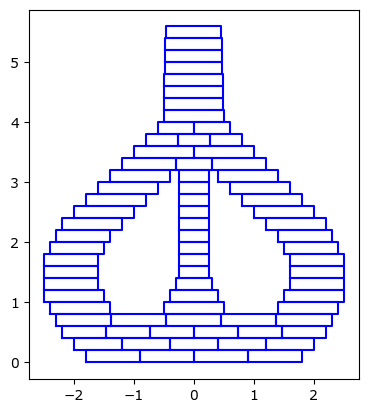

In [22]:
hl=0.2
for i,layer in enumerate(Brickwork):
    y=i*hl
    if y>5.5: 
      break
    for x,w in layer:
      plt.plot((x-w/2,x+w/2,x+w/2,x-w/2,x-w/2),(y,y,y+hl,y+hl,y),'b-')
plt.gca().set_aspect('equal')